In [ ]:
#Colab users uncomment this code
#File for this notebook is census.csv

In [ ]:
"""
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
"""

In [ ]:
"""
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
"""

In [ ]:
"""
downloaded = drive.CreateFile({'id':'1R9vW5dmox7i8OGOoDql_r9yUrvAJgvhD'}) # replace the id with id of file you want to access
downloaded.GetContentFile('census.csv')
"""

# PANDAS
<hr style="height:5px;border-width:2;color:gray">

## What is pandas and why do we need it?

<p>Of the three important data analysis libraries, this is the second and probably the most important, pandas. Hope you have a basic understanding of numpy by now. Pandas is an open source software library written for Python for data manipulation and analysis. It contains data structures and data manipulation tools designed to make data cleaning and analysis fast and easy in Python. It is often used with numpy and other libraries which we will deal in the future.</p>
    
<p>While pandas adopts many coding idioms from NumPy, the biggest difference is that pandas is designed for working with tabular or heterogeneous data. NumPy, by contrast, is best suited for working with homogeneous numerical array data.</p>

<div class="alert alert-block alert-info">
    <b>Here are some important points to keep in mind:</b>
    <ul>
        <li>Even though this notebook might look like (and it is) containing a lot of info, this notebook barely scratches the surface of pandas. But in most of the cases this much knowledge is more than enough.</li>
        <li>You'll be learning a lot of functions here and <del>you need to memorize all of them by the end of this notebook</del> you don't need to remember every one of them. All you need to focus is on <b>understanding what the function does</b> and <b>remember that there exists a function in pandas that does this job.</b></li>
        <li>Feel free to conduct as many experiments as you want with what you know. When you have doubts like what would happen if I write 'this' instead of 'this', just create a new cell and write your code and click run.</li>
        <li>Google and Stack Overflow are your greatest friends. If you forget the syntax or want to know more about any function just google it. If you encounter a problem and are not able to solve it no matter what, you are totally allowed to take help from the internet.<b> Never ever hesitate to Google something that you do not know and want to learn about</b>.</li>
        <li>Links directing to documentation and other resources will be provided here and there. You don't need to learn whatever is in the links. Just take a look at them once and use them for your reference whenever required.</li>
        <li>pandas might seem overwhelming at times. It is not a reason to give up. Just take a short break and continue. But make sure that you are able to understand what's going on. If you are stuck anywhere feel free to PM any of us.</li>
</div>

## Contents
<ul style="list-style-type:circle">
    <li><b>Introduction</b></li>
    <li><b>Series</b></li>
    <li><b>DataFrame</b>
        <ul style="list-style-type:square">
            <li>Basic concepts</li>
            <li>Some not so basic concepts</li>
            <li>Cleaning data</li>
            <li>Merging DataFrames</li>
        </ul>
    </li>
</ul>

#### Now here is a picture of a cute panda to get you motivated :)
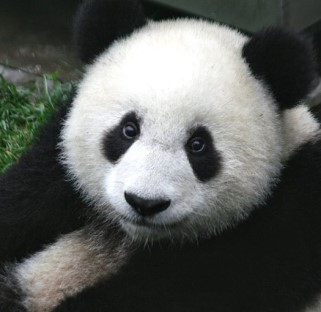

<hr style="height:2px;border-width:2;color:gray">

## INTRODUCTION

Pandas like other libraries like numpy already comes with Anaconda. Hence we can readily import it into our notebook. Generally people import pandas with an alias pd.
<div class="alert alert-block alert-info">
    In case you are using miniconda or are not able to import the library,<br>
    In your desired conda virtual environment, run the following command on your terminal:<br><br>
    <code>conda install pandas</code><br><br>
    or the following code in your notebook:<br><br>
    <code>!conda install pandas</code>
</div>

In [ ]:
import pandas as pd
import numpy as np

Pandas has two main data structures:
<ol>
    <li><b>Series</b>: 1-Dimensional</li>
    <li><b>DataFrame</b>: 2-Dimensional</li>
</ol>

<hr style="height:2px;border-width:2;color:gray">

## SERIES

A Series is a one-dimensional array-like object containing a sequence of values (of similar types to NumPy types) and an associated array of data labels, called its index

### Creating a series

A series can be created using pd.Series() function.

In [ ]:
#Using a python list to create a series
lst = [5, 3, 7, 8]
s = pd.Series(lst)
s

The left column is index and the right column is values. Since we did not specify the index, the values were assigned their corresponding indices in the list.

In [ ]:
#Assigning index while creating a series using index argument
lst = [5, 3, 7, 8] #From next time variables already declared in previous cells will be reused
s = pd.Series(lst, index = ['a', 'b', 'c', 'd'])
s

Now 5, 3, 7 and 8 have indices a, b, c and d respectively.

To get the indices of a series, the Series.index method can be used. It returns an index object.

In [ ]:
s.index

Another way of creating a series is using python dictionaries. The key of the dictionary is treated as index.

In [ ]:
data = {'p' : 6, 'q' : 7, 'r' : 3, 's' : 11}
s = pd.Series(data)
s

### Querying a series

A series can be queried using the indexing operators loc and iloc. <b>loc</b> is used to query using the label indices in the series while <b>iloc</b> queries using integer indices.

In [ ]:
s.loc['q'] #Selects value associated with index q in the series

In [ ]:
s.iloc[3] #Selects value that is stored in 4th position (index 3) i.e element corresponding to index s

In [ ]:
s['q'] #Shorthand for s.loc[]

In [ ]:
s[3] #Shorthand for s.iloc[]

<div class="alert alert-block alert-warning">
    <b>Note:</b> It is generally better to use loc and iloc instead of shorthand operators to prevent ambiguity in case of the series having integer indices. But in most cases we'll be using non-integer indices and hence shorthand [] can be used.
    For more information check out <b>Indexers</b> section in <a href = "https://www.oreilly.com/content/data-indexing-and-selection/">Indexer link</a>
</div>

### Modifying a Series

In [ ]:
s

In [ ]:
s['q'] = 7 #Changing values with index q from 5 to 7
s

The index of a series can be altered by using in place assignment

In [ ]:
s.index = ["A", "B", "C", "D"]
s

### Boolean masking

In [ ]:
s1 = pd.Series({'a':2, 'b':7, 'c':5, 'd':10})
s1

In [ ]:
(s1 > 5) #This returns a boolean series (with same indices) by elementwise comparison

In [ ]:
s2 = pd.Series({'a':3, 'b':5, 'c':5, 'd':11})
s2

In [ ]:
(s1 <= s2) #Two series can be compared element wise if they are identically labeled

Now this boolean series can be used to apply a boolean mask to another series with same dimensions. When we apply a boolean mask it will print only that data in which we pass a boolean value True. Again the rule of indentically labeled must be followed.

In [ ]:
s1[s1 > 5] #Returns all the values in s1 that are greater than 5

In [ ]:
s1[s1 <= s2] #Returns all the values in s1 that are less than or equal to corresponding values in s2

### Functions and operations on series
It is important to note that operators and functions that work on numpy arrays work on pandas series too

In [ ]:
s1

In [ ]:
s2

In [ ]:
s1 + 2 #Adding a scalar to a series

In [ ]:
s1 + s2 #Adding corresponding elements of two series

In [ ]:
np.sum(s1) 

In [ ]:
np.mean(s2)

Equivalently these can be written as

In [ ]:
s1.sum()

In [ ]:
s1.mean()

So that's it for the Series data structure as of now. Next we'll head on to the 2-Dimensional data structure DataFrame.

<hr style="height:2px;border-width:2;color:gray">

## DATAFRAMES

A DataFrame represents a rectangular table of data and contains an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.). The DataFrame has both a row and column index; it can be thought of as a dictionary of Series all sharing the same index. Under the hood, the data is stored as one or more two-dimensional blocks rather than a list, dict, or some other collection of one-dimensional arrays. <br><br>
Most functions that are applied to DataFrames can also be applied to Series.<br><br>
A dataframe has two axes.<br>
axis = 0 refers to the vertical axis. It refers to rows of the dataframe. <code>index</code> refers to row index in atrributes of a function.<br>
axis = 1 refers to the horizontal axis. It refers to columns of the dataframe. <code>columns</code> refers to column indices (or column names) on attributes of a function

### SOME BASIC CONCEPTS

### Creating a DataFrame
Pandas Dataframes can be created using <code>pd.DataFrame()</code>. One of the most common ways of creating a dataframe is from a dictionary of equal-length lists or NumPy arrays. The keys are treated as column names.

In [ ]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'], 
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
df = pd.DataFrame(data)
df

Similar to a series, since we did not specify an index for the rows, default integer indices were assigned.<br><br>
Another way to create a dataframe is using a series for each row.

In [ ]:
purchase_1 = pd.Series({'Name': 'Chris',
                        'Item Purchased': 'Dog Food',
                        'Cost': 22.50})
purchase_2 = pd.Series({'Name': 'Kevyn',
                        'Item Purchased': 'Kitty Litter',
                        'Cost': 2.50})
purchase_3 = pd.Series({'Name': 'Vinod',
                        'Item Purchased': 'Bird Seed',
                        'Cost': 5.00})
df = pd.DataFrame([purchase_1, purchase_2, purchase_3], index=['Store 1', 'Store 1', 'Store 2'])
df

Make sure to notice the differences between the two methods.

### Some basic functions on dataframes

In [ ]:
#Creating a suitable dataframe
data = {'Val 1': [5, 8, 7, 6,  5, 3, 9],
        'Val 2': [3, 7, 9, 2, 9 , 1, 11],
        'Val 3': [2, 9, 12, 17, 8, 4, 23]}
df = pd.DataFrame(data)
df

<code>df.head(n)</code> returns first n rows of a dataframe and <code>df.tail(n)</code> returns the last n rows of a dataframe. These are used mainly in case of large dataframes with hundreds of rows and we need to get an idea about the structure of the dataframe. If n is not specified first 5 or last 5 rows are returned.

In [ ]:
df.head()

In [ ]:
df.tail(3)

<code>df.describe()</code> is a function that gives the statistical summary of the dataframe.

In [ ]:
df.describe()

<code>df.info()</code> prints a concise summary of a DataFrame

In [ ]:
df.info()

<code>df.T</code> is used to get the transpose of a dataframe

In [ ]:
df.T

In [ ]:
df #Keep in mind that df.T doesn't change the original dataframe but creates a new dataframe

### Querying

A dataframe is queried in similar manner to a series

In [ ]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'], 
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
df = pd.DataFrame(data, index = ['A', 'B', 'C', 'D', 'E', 'F'])
df

In [ ]:
df.loc['C', ['state', 'pop']] #The state and pop values of row C are returned in the form of a series

In [ ]:
df.loc[:, ['state', 'pop']] #The state and pop values of all rows are returned in the form of a dataframe

In [ ]:
df.iloc[2, 2] #Simalarly iloc also can be used

In [ ]:
df['state'] #Querying a column using shorthand []

In [ ]:
df[['year', 'pop']] #Querying a set of columns

Boolean masking works on a dataframe just like it does in a series

In [ ]:
df[df['pop'] > 2] #Selecting rows with population greater than 2

In [ ]:
df[df['pop']>3]['state'] #Querying names of states with population greater than 2

### Manipulation

In [ ]:
df

In [ ]:
df.index #Returns an index objext of all rows

In [ ]:
df.columns #Returns an index object of all columns

In [ ]:
#Renaming column name pop to population and state to State
df.rename(columns = {'pop': 'population', 'state': 'State'}, inplace = True)
df

<code>inplace = True</code> makes all the manipulations to the original dataframe itself. Most of the functions don't modify the dataframe if you don't specify inplace as True. So if you want to modify the orginal dataframe, either set <code>inplace = True</code> or reassign the new dataframe to the old variable like,<br><br>
<code>df = df.rename(columns = {'pop': 'population', 'state': 'State'})</code>
<br><br>
Also note that df.rename can also be used to rename indices

A column can be added the way you would add it to a dictionary

In [ ]:
df['GDP'] = [7.4, 2.3, 4.5, 1.2, 3.9, 2.5]
df

A new column can hold values determined by existing columns

In [ ]:
df['GDP per capita'] = (df['GDP']/ df['population'])
df

In [ ]:
#Adding a new row to the dataframe can be done in a similar way
df.loc['G'] = ['Texas', '2001', 2.5, 4.2, 1.68]
df

### df.drop()

In [ ]:
#Drops columns GDP and GDP per capita
df.drop(columns = ['GDP', 'GDP per capita'], inplace = True)
df

In [ ]:
#Drops row 'G'
df.drop(index = 'G')

In [ ]:
df

Since <code>inplace</code> is <code>False</code> by default, the row still exists in the dataframe

## SOME NOT SO BASIC CONCEPTS

### Reading from files
In Data Science and ML, the data is obtained in files like csv, excel, text etc.<br>
One of the most common kind of file is csv or comma separated values.<br><br>
There should be a file called <code>census.csv</code> in the current folder. Go ahead and open it in notepad to get an idea how csv files exist.<br><br>
Now I'd like to make you familiar with the pandas documentaion as you'll be using it a lot in the future. Go ahead and open this <a href = "https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html">link</a> and check out the function we are going to use. The documentation has the information about the function and all its attributes.<br><br>
<code>pd.read_csv()</code> has a lot of attributes and gives us a lot of control on how to read our csv file into a dataframe.
<br><br>
You can also get help inside the notebook regarding a function like this. Make sure to close it before moving on

In [ ]:
pd.read_csv?

In [ ]:
#Reading census.csv into dataframe df
df = pd.read_csv("census.csv")
df

<div class="alert alert-block alert-warning">
    <b>Note:</b> If the file to read is stored in current folder, only filename is enough to read it. If it is saved in some other folder, entire file path must be given.
</div>

One of the most important attributes is <code>skiprows</code> which skips rows in the csv file. Read the documentation attribute description to see how it exactly works.

In [ ]:
#Skipping rows with inidices 1 to 3
df = pd.read_csv("census.csv", skiprows = range(1,4))
df

### Reindexing and Hierarchical indexing

In [ ]:
df = pd.read_csv('census.csv')
df.head()

Reindexing is the process of changing the index of a dataframe to one or more columns. A particular column or columns can be set as index using <code>df.set_index()</code>.

In [ ]:
df = df.set_index('STNAME') 
#df.set_index() creates a new dataframe and hence to reflect changes it is assigned to same dataframe
df

<code>df.reset_index()</code> does the opposite of <code>df.set_index()</code> and sets the index of dataframe back to integer indices

In [ ]:
df = df.reset_index()
df

When two or more columns are given as a list to <code>df.set_index()</code>, hierarchical indexing can be observed.

In [ ]:
df = df.set_index(['STNAME', 'CTYNAME'])
df

### df.apply()
<code>df.apply()</code> applies a function along an axis of a dataframe.

In [ ]:
df

In [ ]:
df_sum = df.apply(sum, axis = 0) #Sum along 0 axis (vertical axis)
df_sum

Generally python lambda functions as custom created functions. Read more about lambda functions <a href = "https://www.geeksforgeeks.org/python-lambda/">here</a> and further applications of <code>df.apply()</code> <a href = "https://www.w3resource.com/pandas/dataframe/dataframe-apply.php">here</a>.

### Sorting
A dataframe can be sorted in two ways.<br>
1. <code>sort_index()</code> : Sorts the rows or columns of a dataframe by index.
2. <code>sort_values()</code> : Sorts the rows by values of one or more columns.

In [ ]:
df = pd.DataFrame({"Fruit": ["Mango", "Banana", "Apple"], "Price": [35, 14, 35]}, index = ["B", "C", "A"])
df

In [ ]:
df.sort_index(axis = 0)

In [ ]:
df.sort_index(axis = 1, ascending = False) #Sort columns in Descending order

In [ ]:
df.sort_values(by = ["Price", "Fruit"]) #Sorts first by price and then by fruit name

### df.groupby()
Groupby is one of the most important functions that will be used in the data handling process.<br>
Groupby operation is used to perform a split-apply-combine process on a pandas object (Series or DataFrame). The object is first <b>split</b> into groups and a function is <b>applied</b> on each group. Finally all the groups are <b>combined</b> to form another pandas object.
The following image should give some clarity
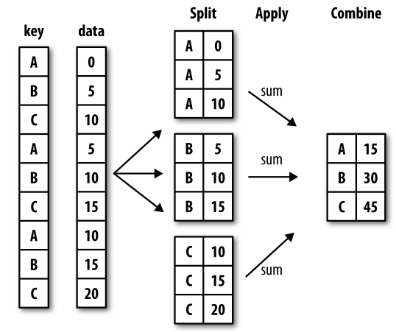

In [ ]:
df = pd.DataFrame( {'key' : ['one', 'two', 'one', 'two', 'one'], 
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df


In [ ]:
#Grouping rows having same key
df.groupby('key')

In [ ]:
#Sum of values in same group using sum()
df.groupby('key').sum()
#You can also use other aggregate functions like mean, std etc.

This is just one way of using grouby. Groupby is a very powerful function which is extensively used and can be confusing at times. The objects can also be grouped by function, series, dictionaries. So I recommend you go through this <a href = "https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html">Documentation</a> and this <a href = "https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html">Guide</a>.

## CLEANING DATA

Most of the real world data is not analysis ready and hence ML models cannot be applied. The data may contain missing data, duplicate data and many other issues and hence pandas gives certain tools to handle this.

### Missing Data
In a pandas, a missing value or python <code>None</code> is treated as a numpy Not a Number i.e, <code>np.NaN</code> and these can resolved in different ways based on the scenario.

In [ ]:
df = pd.DataFrame([[1., 6.5, 3.], [1., None, None], [None, None, None], [None, 6.5, 3.]])
df

In [ ]:
df.info()

In [ ]:
#Dropping all rows containing null value
df.dropna()

In [ ]:
#Filling missing value using a particular value
df.fillna(5)

In [ ]:
#Filling missing value using forward fill which fills the NaN with previous numerical values
df.fillna(method = 'ffill')

There are other methods of filling which you can checkout in documentation

### Duplicate Data

In [ ]:
df = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'], 'k2': [1, 1, 2, 3, 3, 4, 4]})
df

In [ ]:
df.drop_duplicates() #Drops all duplicate rows

## MERGING DATAFRAMES
Another useful operation on dataframes is merging of two dataframes.

In [ ]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data1': range(7)})
df1

In [ ]:
df2 = pd.DataFrame({'key': ['a', 'b', 'd'], 'data2': range(3)})
df2

In [ ]:
pd.merge(df1, df2, on = 'key', how = 'outer')

In [ ]:
pd.merge(df1, df2, on = 'key', how = 'inner')

<code>pd.merge()</code> merges two dataframes. The <code>on</code> attribute tells on which column or row the dataframe needs to be merged. <code>how</code> tells you how the joining is done. "outer" is equivalent to union between two sets and "inner" is equivalent to intersection between two sets (which you may have already noticed in the above example.

There are many more attributes in <code>pd.merge()</code> which may be useful. This is a <a href = "https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html">link</a> to it's documentation.<br>
At this point I realize I'm asking you to look through the documentation a lot but looking through the documentation is a very important skill for any developer. Developing that skill is also one of the goals of this course.

#### So that's it for pandas for now. Hope you learnt something new. As I already told, Google is your friend. This notebook acts as an introductory guide. If you don't remember syntax of any function feel free to Google it.